# Problem Statement -> Given all the features in data of 'TITANIC SURVIVAL                                                 DATASET' we need to find if a particular person                                                       survived or not.
                                        

# Steps

1. Import the libraries
2. Import the dataset
3. Perform the Data Analysis (DM, DE, DC, DV, EDA)
4. Feature Scaling [Optional]
5. Encoding
6. Feature Selection
7. Choosing the model - Logistic Regression
8. Split the data - CV
9. Training the model
10. Test the model
11. Performance - Confusion Metric

# Importing libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

# Import the dataset

Link: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

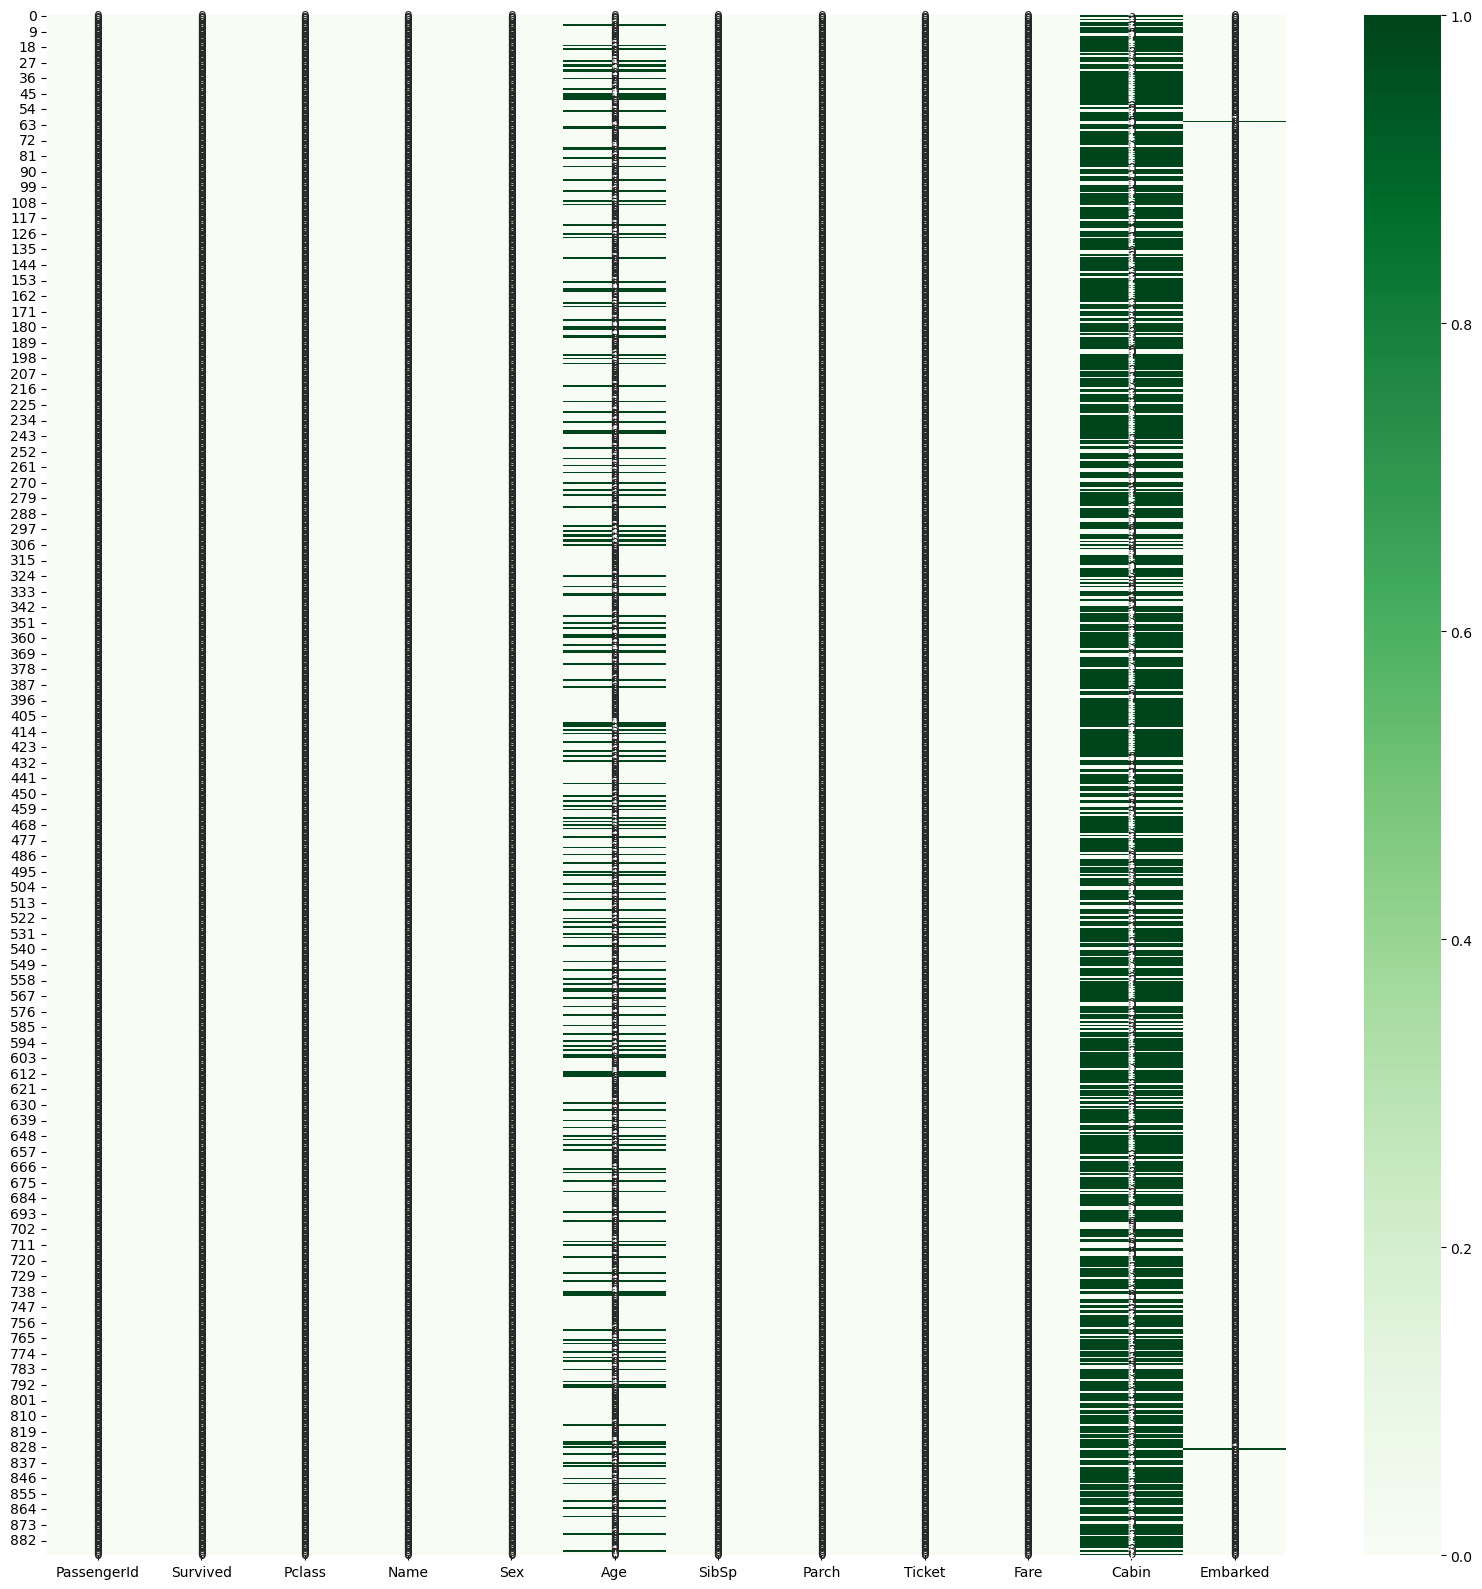

In [8]:
# null values of particular column in a heat map
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(), annot=True, cmap='Greens')

In [9]:
# Age % of null values
(df.Age.isnull().sum()/len(df.Age))*100

19.865319865319865

In [10]:
# Cabin % of null values
(df.Cabin.isnull().sum()/len(df.Cabin))*100

77.10437710437711

In [11]:
# unique cabins
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Drop the Cabin feature because 77% data is NAN , very difficult to predict that from so much unique cabins.
df.drop('Cabin', axis=1, inplace=True)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [16]:
df.Embarked.unique()
# S - Southampton
# Q - Queenstown
# C - Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
# Show the datapoint where the Embarked is null
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [18]:
# Show all the Embarked value where the Pclass = 1
df.loc[df.Pclass==1,"Embarked"].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [19]:
# Show all the Embarked value where the Pclass = 2
df.loc[df.Pclass==2,"Embarked"].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [20]:
# Show all the Embarked value where the Pclass = 3
df.loc[df.Pclass==3,"Embarked"].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [21]:
# Show all the Embarked value where the Fare = 80.0
df.loc[df.Fare==80.0,"Embarked"].value_counts()

Series([], Name: Embarked, dtype: int64)

In [22]:
# Show all the Embarked value where the Ticket = 113572
df.loc[df.Ticket==113572,"Embarked"].value_counts()

Series([], Name: Embarked, dtype: int64)

In [23]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [24]:
# Mean of Age column
df.Age.mean()

29.69911764705882

In [25]:
# Median of Age column
df.Age.median()

28.0

In [26]:
# Mode of Age column
df.Age.mode()

0    24.0
Name: Age, dtype: float64

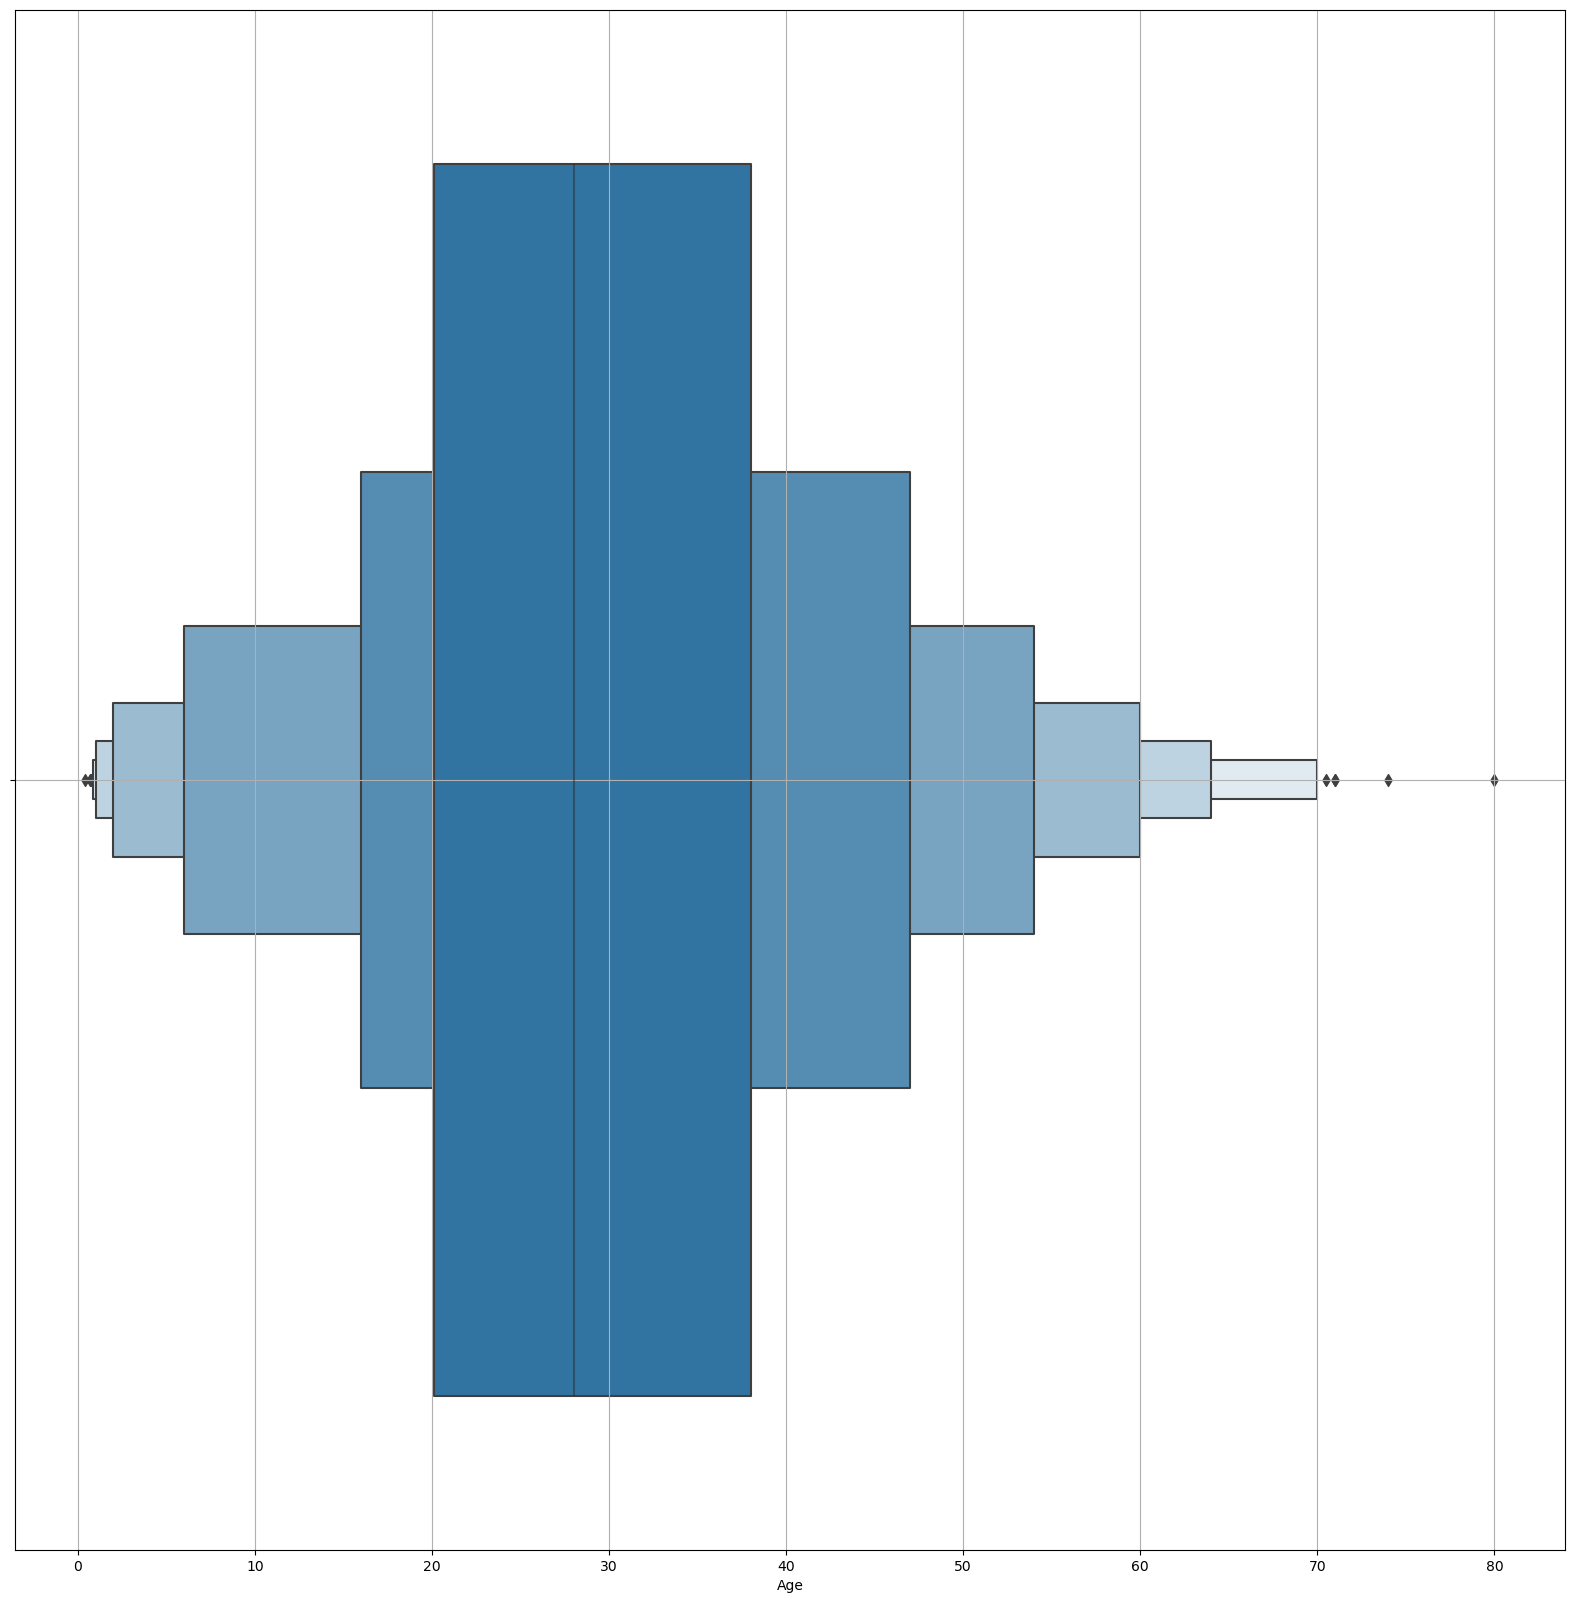

In [27]:
# Plot a boxpolot to find out the outliers in the Age columns
plt.figure(figsize=(20,20))
sns.boxenplot(data=df, x='Age')
plt.grid()

In [28]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [29]:
df.shape

(891, 11)

In [30]:
# Fill all the null values in the Age column with its median value because age will be in some specific range if in case of outlier
df.Age.fillna(value=df.Age.median(),inplace=True)

In [31]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [32]:
# Drop the rows where Embarked is Null beacuse of all the earlier analysis says that we can't predict these 2 Embarke values on
# the basis of any feature
df.dropna(inplace=True)

In [33]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
df.shape

(889, 11)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
# Drop off the columns - PassengerId, Name, Ticket because these will not help in any case to say that the person has survived or not
df.drop(['PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)

In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


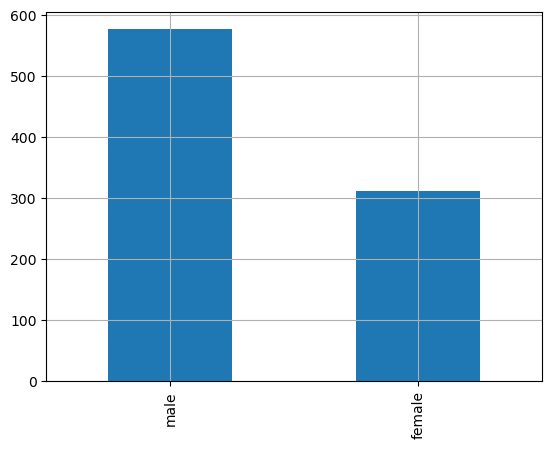

In [38]:
# Plot a graph : Strength of Male V/s Strength of Female
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

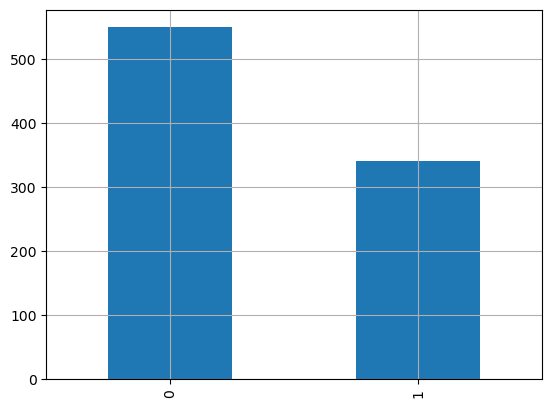

In [39]:
# Plot a graph : Strength of Survival V/s Strength of Non-survival
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

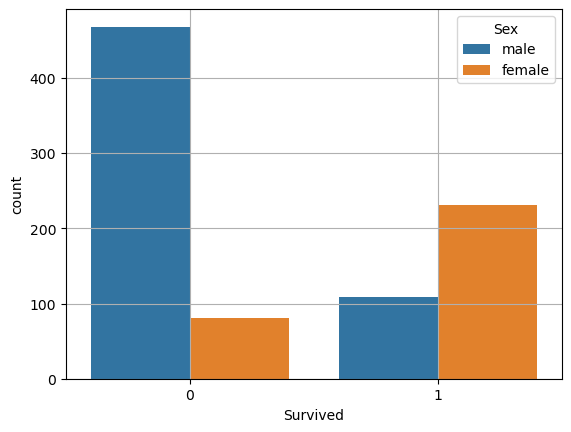

In [40]:
# Plot a graph to find out the survival & non-survival rate w.r.t. Sex
sns.countplot(x='Survived', data=df, hue='Sex')
plt.grid()

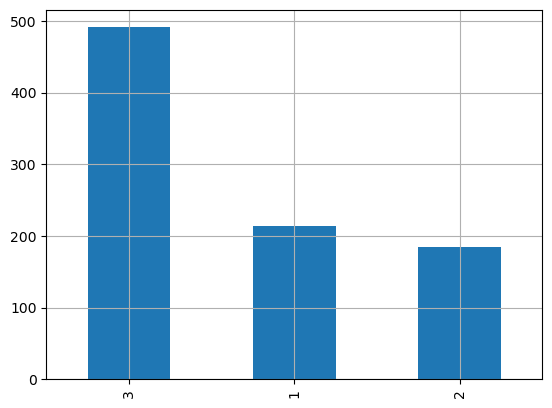

In [41]:
# Plot a graph to find out the strength of the Pclass
df.Pclass.value_counts().plot.bar(df.Pclass)
plt.grid()

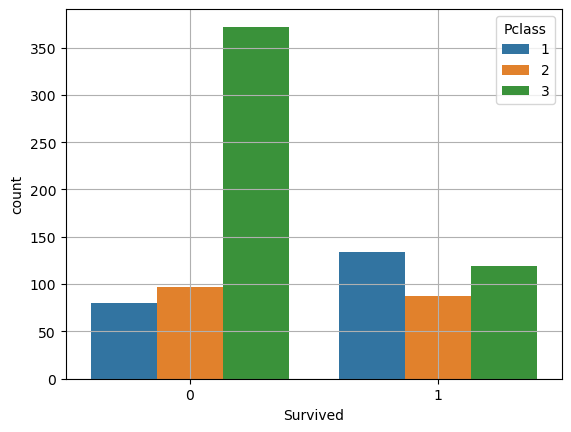

In [42]:
# Plot a graph to find out the survival & non-survival rate w.r.t. Pclass
sns.countplot(x='Survived', data=df, hue='Pclass')
plt.grid()

In [43]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [44]:
# Changing the Age dtype to 'int'
df.Age = df.Age.astype(int)

In [45]:
df.Fare = round(df.Fare,2)

# Encoders - To convert the data from the categorical form to numerical form without changing its meaning

In [46]:
# Label encoding for the column Sex
# from sklearn.preprocessing import LabelEncoder

In [47]:
# Label encoding for the column Sex
enc = LabelEncoder()

In [48]:
df.Sex = enc.fit_transform(df.Sex)

In [49]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [50]:
# One Hot encoding for the column Embarked

In [51]:
newdf = df.copy()

In [52]:
#new = df.copy()

In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [54]:
newdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [55]:
# using get_dummmies function to encode Embarked classes
pd.get_dummies(newdf['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [56]:
# concating embarked encoded classes
df = pd.concat([df, pd.get_dummies(df['Embarked'])], axis=1)

In [57]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1


In [58]:
df.drop(['Embarked', 'C'], axis=1, inplace=True)

In [59]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    int32  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(1), int32(2), int64(4), uint8(2)
memory usage: 50.4 KB


<AxesSubplot:>

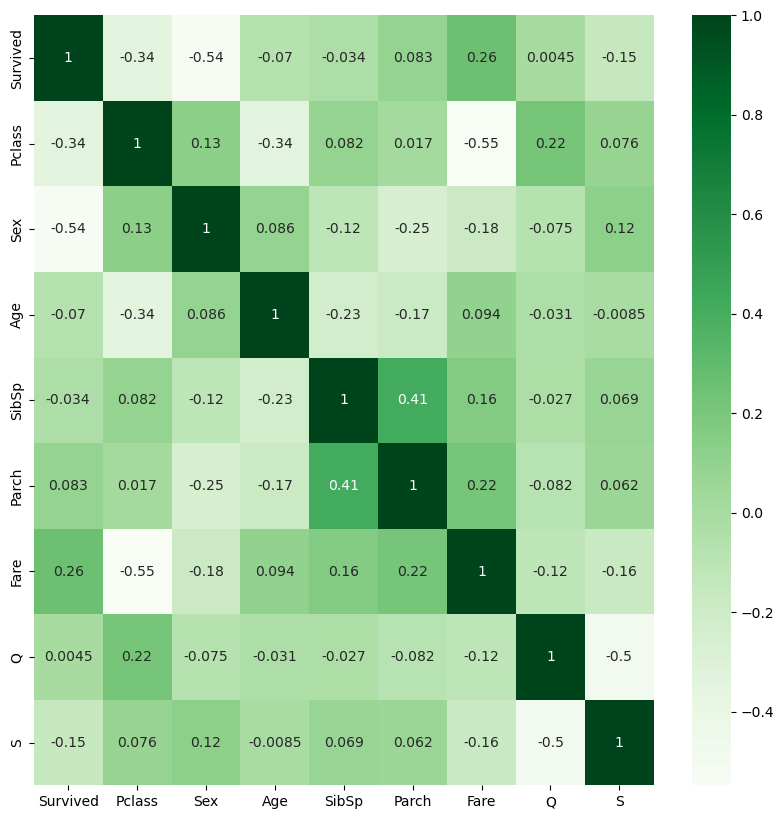

In [61]:
# heatmap to see correlation of all features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

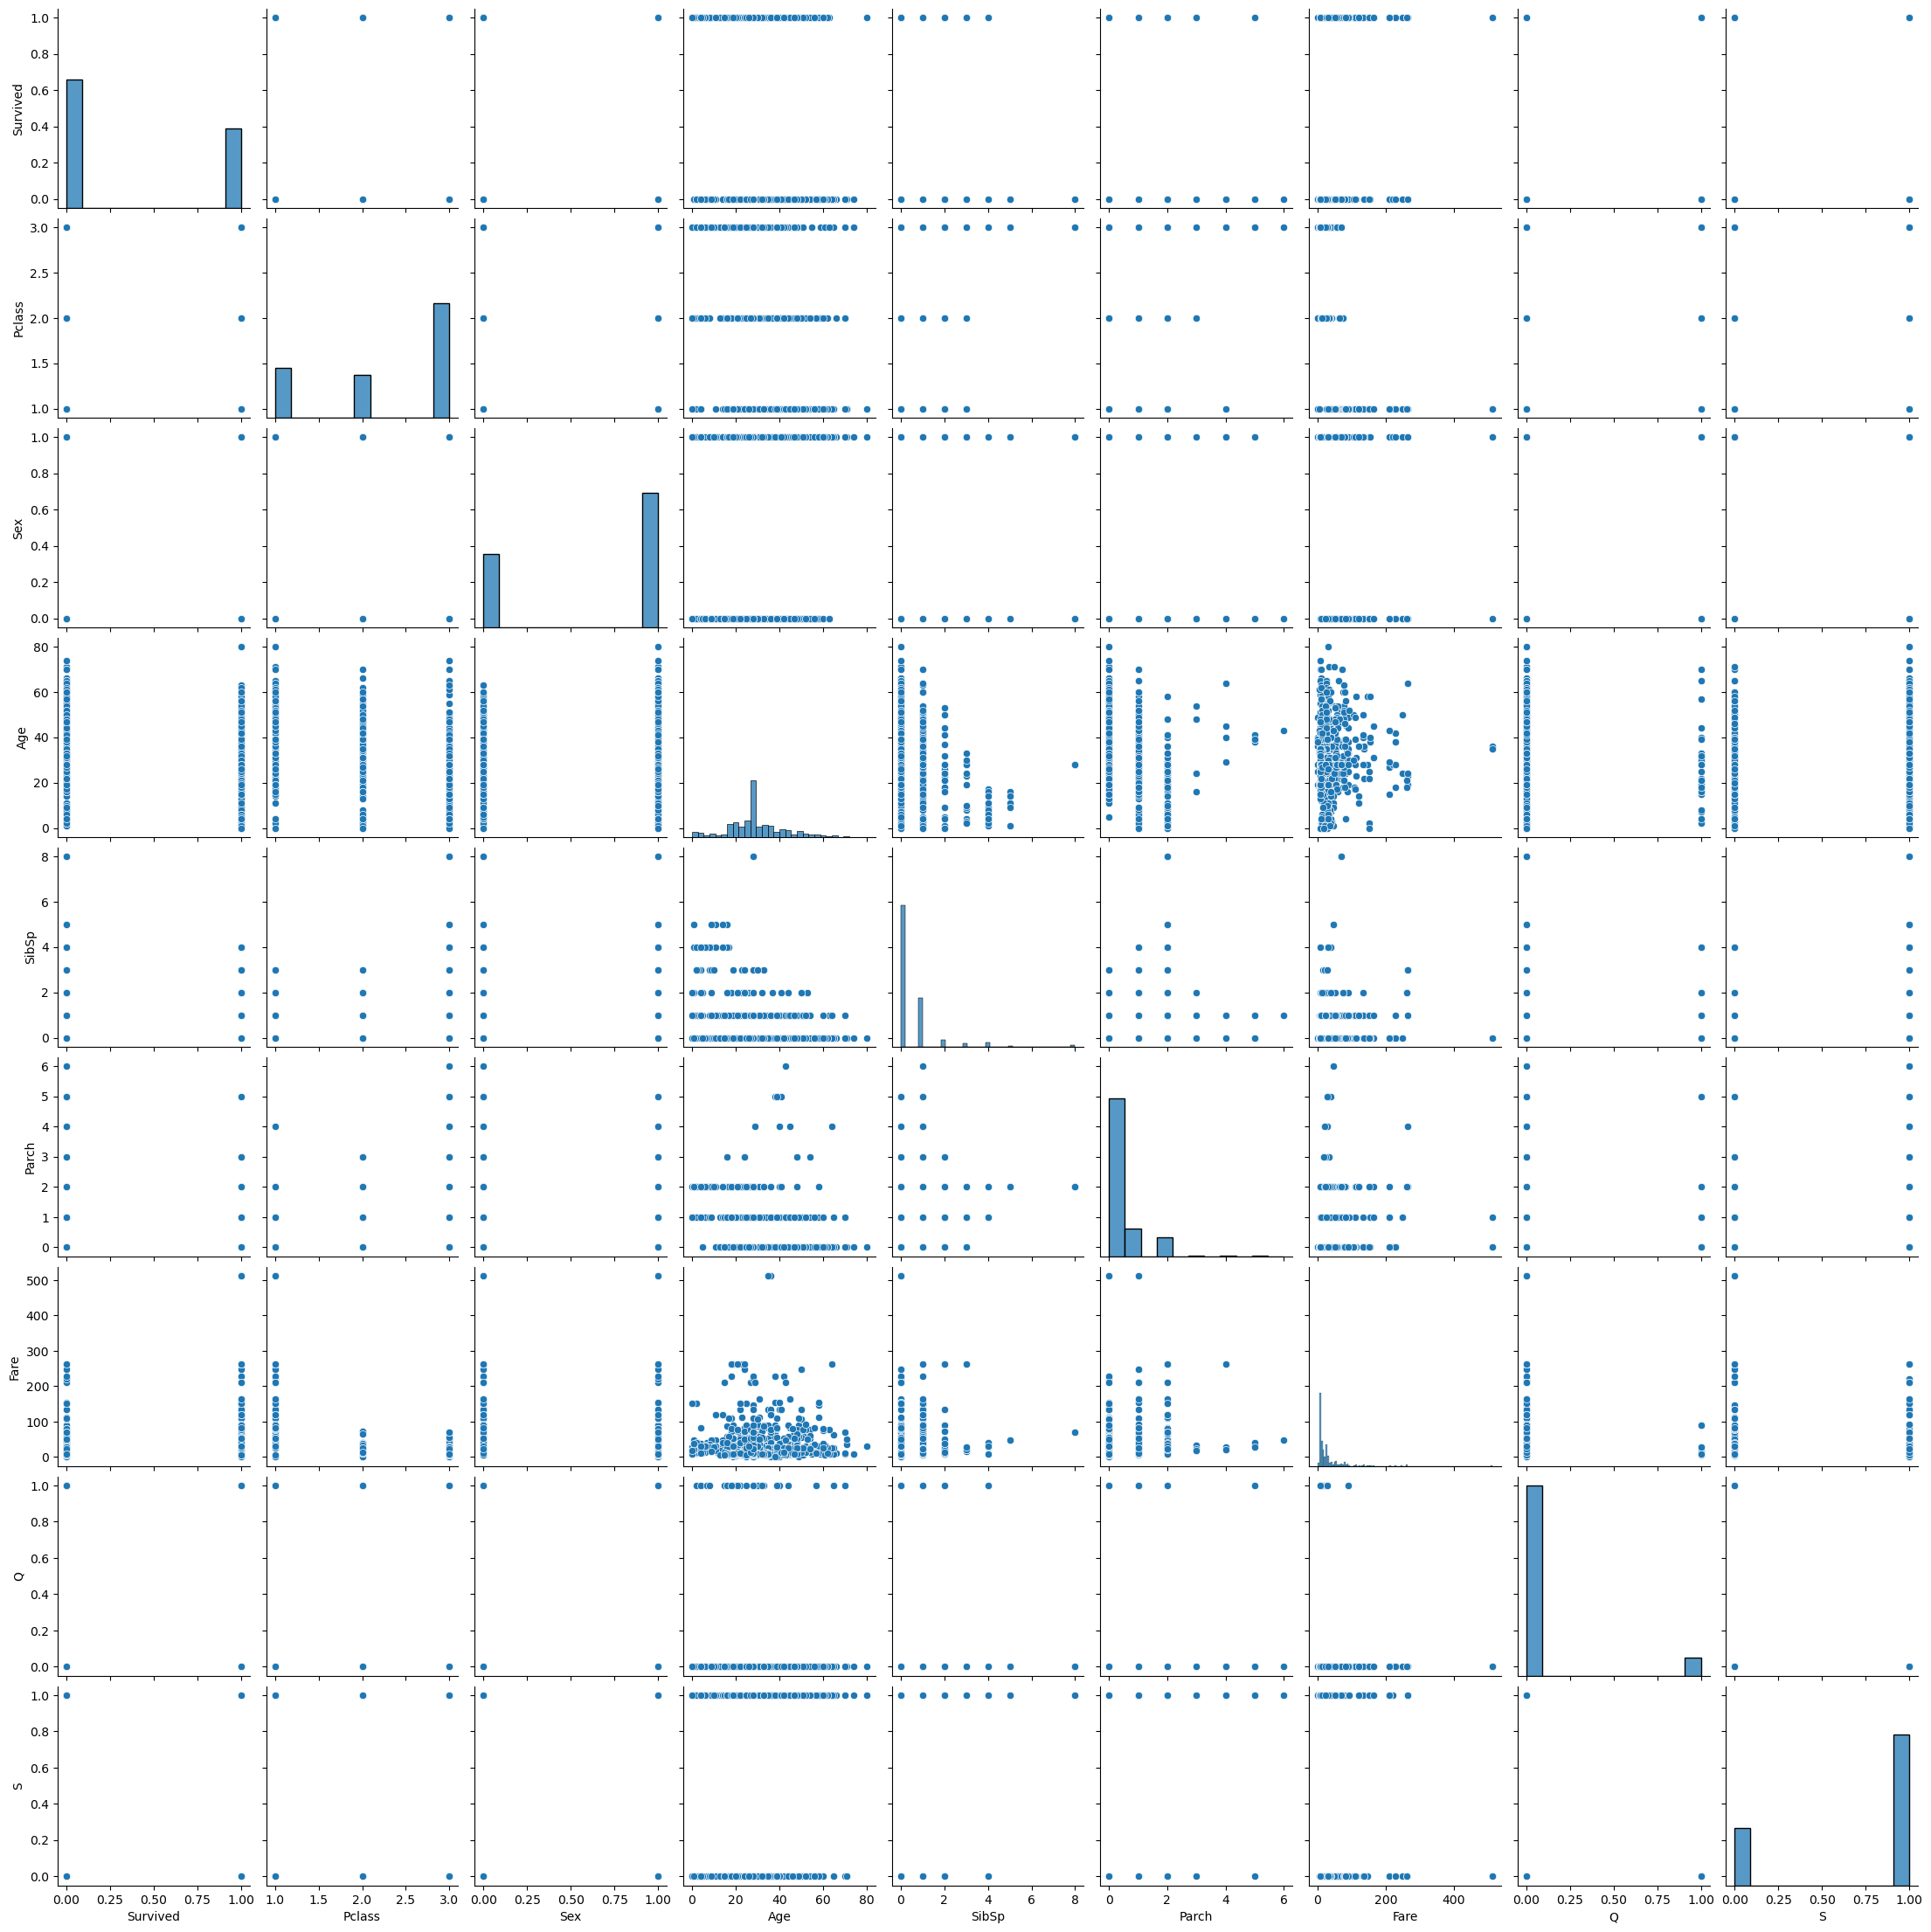

In [62]:
sns.pairplot(df)

# Feature Importance / Feature Selection

In [63]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [64]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [65]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,0,1
1,1,0,38,1,0,71.28,0,0
2,3,0,26,0,0,7.92,0,1
3,1,0,35,1,0,53.10,0,1
4,3,1,35,0,0,8.05,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,0,1
887,1,0,19,0,0,30.00,0,1
888,3,0,28,1,2,23.45,0,1
889,1,1,26,0,0,30.00,0,0


In [66]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [67]:
# from sklearn.ensemble import ExtraTreesClassifier

In [68]:
feat = ExtraTreesClassifier()

In [69]:
feat.fit(X,y)

ExtraTreesClassifier()

In [70]:
feat.feature_importances_

array([0.1122362 , 0.29270421, 0.24406684, 0.04653132, 0.04141714,
       0.23593933, 0.00831466, 0.01879031])

<AxesSubplot:>

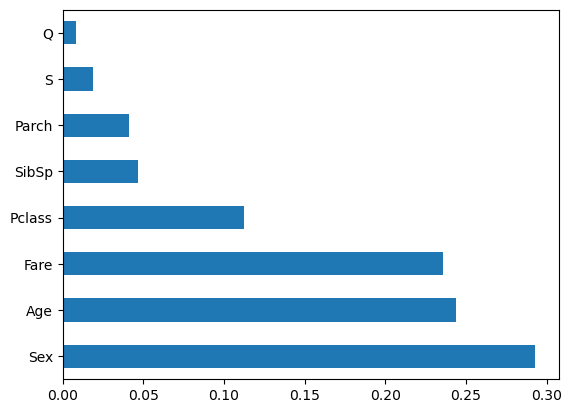

In [71]:
# Graph to show importance of features 
feat_imp = pd.Series(feat.feature_importances_, index=X.columns)
feat_imp.nlargest(8).plot(kind='barh')

# Spliting the data

In [72]:
skf = StratifiedKFold(n_splits=5)

In [73]:
for train_index, test_index in skf.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [74]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
714    0
715    0
718    0
719    0
721    0
Name: Survived, Length: 712, dtype: int64

In [75]:
y_test

706    1
707    1
708    1
709    1
710    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 177, dtype: int64

# Model Selection 

In [229]:
# Create Logistic Regression model
classifier = LogisticRegression(max_iter=500)

# Training the model

In [230]:
classifier.fit(X_train,y_train)


LogisticRegression(max_iter=500)

# Test the model

In [231]:
y_pred = classifier.predict(X_test)

# EDA

In [232]:
final = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

In [233]:
final.head()

,Actual,Predicted
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<AxesSubplot:>

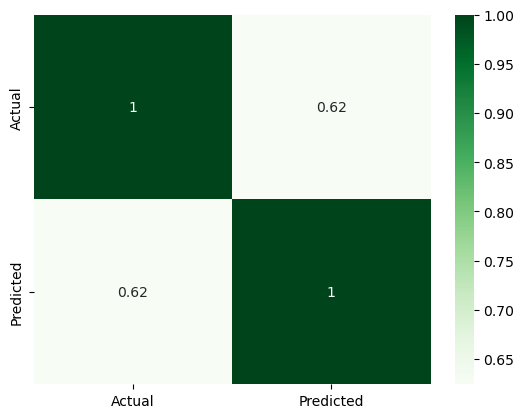

In [234]:
sns.heatmap(final.corr(), annot=True, cmap='Greens')

# Performance Metric - Confusion Matrix

In [235]:
confusion_matrix(y_test, y_pred)

array([[98, 11],
       [20, 48]], dtype=int64)

In [236]:
#accuracy = (98+48)/Total
# = 146/177 = 0.824

In [237]:
#from sklearn.metrics import accuracy_score

In [238]:
accuracy_score(y_test,y_pred)

0.8248587570621468

In [239]:
#from sklearn.metrics import classification_report

In [240]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       109\n           1       0.81      0.71      0.76        68\n\n    accuracy                           0.82       177\n   macro avg       0.82      0.80      0.81       177\nweighted avg       0.82      0.82      0.82       177\n'

## Therefore our model is getting accuracy of 82%